In [1]:
import sys
import ROOT

Welcome to JupyROOT 6.12/06


In [2]:
#from keras.utils import np_utils
import numpy as np
import sys
from pylab import figure, axes, pie, title, show
import h5py
import pandas as pd  

import matplotlib.pyplot as plt 
from os import environ 
from pandas import read_hdf

#input_file='/Users/elenavillhauer/h_bbar_DL/lowpileup/Keras_output__D_80_64_32_32_16_8_4_2__BN_relu_adam_clipn0_binary_crossentropybcujets_pTmax300GeV__b_reweighting_tensorflow__lr10_trainBS64_nE100_s12264_val10.h5'
#input_file='/Users/elenavillhauer/h_bbar_DL/Keras_output__D_80_64_32_32_16_8_4_2__BN_relu_adam_clipn0_binary_crossentropybcujets_pTmax300GeV__b_reweighting_tensorflow__lr10_trainBS256_nE100_s12264_val10.h5'
#input_file='/Users/elenavillhauer/h_bbar_DL/output_highpileup/Keras_output__D_80_64_32_32_16_8_4_2__BN_relu_adam_clipn0_binary_crossentropybcujets_pTmax300GeV__b_reweighting_tensorflow__lr10_trainBS256_nE500_s12264_val10.h5'
#input_file='/Users/elenavillhauer/h_bbar_DL/output_lowpileup_157_559pm/Keras_output__D_80_64_32_32_16_8_4_2__BN_relu_adam_clipn0_binary_crossentropybcujets_pTmax300GeV__b_reweighting_tensorflow__lr10_trainBS128_nE500_s12264_val10.h5'
input_file='/eos/user/e/ebusch/DL_training/DL_train_double_b/scripts/KerasFiles_fullpt/D_80_64_32_32_16_8_4_2__BN_relu_adam_clipn0_binary_crossentropy/Keras_output/Keras_output__D_80_64_32_32_16_8_4_2__BN_relu_adam_clipn0_binary_crossentropybcujets_pTmax300GeV__b_reweighting_tensorflow__lr10_trainBS128_nE100_s12264_val10.h5'
#input_file1='/Users/juechen/Documents/course/research/double-bplots/test15_Preprocessed.h5'
f =h5py.File(input_file,'r')
#f1 =h5py.File(input_file1,'r')

#print (f)
Y_test=f['Y_test'][:]
X=f['X_test'][:]
#Y_test1=f1['Y_test'][:]
print(len(Y_test))
#print(a)
a=len(Y_test)
#Y1=Y_test1[:a,1]+Y_test1[:a,2]*2+Y_test1[:a,4]*4+Y_test1[:a,3]*3
Y=Y_test[:a,1]


#Y_pred1=f1['Y_pred'][:a]
Y_pred=f['Y_pred'][:a]
#mv2c_Lead1=f1['baseline_tagger'][:a,2]
#mv2c_SubLead1=f1['baseline_tagger'][:a,3]
mv2c_Lead=f['baseline_tagger'][:a,2]
mv2c_SubLead=f['baseline_tagger'][:a,3]
jet_pt=(f['jet_pt'][:a]*4.06372854e5+8.13357791e5)/1000
#jet_pt1=(f1['jet_pt'][:a]*4.06372854e5+8.13357791e5)/1000
weight=f['weight'][:a]
#weight1=f1['weight'][:a]
classes=f['class'][:a]
#classes1=f['class'][:a]
#print(np.shape(classes))

f.close()
#f1.close()
print("Y_pred",Y_pred[:,0])
df0 = pd.DataFrame({"weight":weight, "Y0": Y_pred[:,0].ravel(),"Y1": Y_pred[:,1].ravel(),"classes":classes.ravel(),"Y":Y.ravel(), "mv2c_Lead":mv2c_Lead.ravel(),"mv2c_SubLead":mv2c_SubLead.ravel(), "jet_pt":jet_pt.ravel()})
#df10 = pd.DataFrame({"weight":weight.ravel(), "Y0": Y_pred[:,0].ravel(),"classes":classes.ravel(),"Y":Y.ravel(), "mv2c_Lead":mv2c_Lead.ravel(),"mv2c_SubLead":mv2c_SubLead.ravel(), "jet_pt":jet_pt.ravel()})
#print (df0[df0['Y']!=df0['classes']])
df0['single_b_mv2']=df0[['mv2c_Lead', 'mv2c_SubLead']].max(axis=1)
df0['double_b_mv2']=df0[['mv2c_Lead', 'mv2c_SubLead']].min(axis=1)
#df10['single_b_mv2']=df10[['mv2c_Lead', 'mv2c_SubLead']].max(axis=1)
#df10['double_b_mv2']=df10[['mv2c_Lead', 'mv2c_SubLead']].min(axis=1)
#print(classes==0, Y_test[Y_test[:,0]==1])
print(len(weight))
df=df0[(df0['Y']==0)&(df0['jet_pt']<=2000)]

#print(mine)
####################   mv2c  cut
bkg=df0[df0['Y']==1]
mv2c=df[(df['single_b_mv2']>0.83)]

mv2c_d=df[(df['double_b_mv2']>0.11)]
mine_bkg=bkg[bkg['classes']==1]
mv2c_bkg=bkg[(bkg['single_b_mv2']<0.83)]
mv2c_bkg_d=bkg[(bkg['double_b_mv2']<0.11)]

#df1=df10[(df10['Y']==0)]
#df1=df10[df10['Y']==0]
#mine1=df1[df1['classes']==0]
mine=df[df['classes']==0]

#bkg = pd.DataFrame({"weight":weight, "Y0": Y_pred[:,0].ravel(),"Y1": Y_pred[:,1].ravel(),"classes":classes.ravel(),"Y":Y.ravel(), "mv2c_Lead":mv2c_Lead.ravel(),"mv2c_SubLead":mv2c_SubLead.ravel(), "jet_pt":jet_pt.ravel()})


#mv2c1=df1[(df1['mv2c_Lead']>0)&(df1['mv2c_SubLead']>0.5)]
#plt.subplot(2, 1, 2)
#print (np.shape( df0['single_b_mv2']>0.64))
#from pandas_ml import ConfusionMatrix
#confusion_matrix = ConfusionMatrix(df0['Y'], df0['classes'])
#print (df['Y'])
#print (confusion_matrix)
#confusion_matrix1 = ConfusionMatrix(df0['Y'],~(df0['single_b_mv2']>0.94))
#print (confusion_matrix1)

#confusion_matrix.print_stats()

#confusion_matrix.plot()
#plt.xlabel('Predicted Hbb (0) non Hbb(1)' )
#plt.ylabel('Truth Hbb (0) non Hbb(1)')
#plt.show()

#confusion_matrix1.plot()
#plt.title('DL')
#plt.xlabel('Predicted Hbb (0) non Hbb(1)' )
#plt.ylabel('Truth Hbb (0) non Hbb(1)')
#plt.show()




681
('Y_pred', array([  9.89420056e-01,   9.94903803e-01,   9.89256263e-01,
         9.96056080e-01,   1.21869795e-01,   9.94609952e-01,
         9.88173306e-01,   9.94315922e-01,   9.86907363e-01,
         5.78965768e-02,   9.82949257e-01,   9.97039318e-01,
         9.95395601e-01,   9.83008564e-01,   9.91996348e-01,
         9.99353588e-01,   9.92676973e-01,   9.90597427e-01,
         9.77774262e-01,   9.93521154e-01,   4.14927304e-03,
         9.89607394e-01,   9.94058371e-01,   9.96007502e-01,
         9.92982388e-01,   9.92600977e-01,   4.83098120e-04,
         9.82919097e-01,   9.93355155e-01,   9.77006495e-01,
         9.84194338e-01,   3.47697805e-03,   9.96201694e-01,
         9.93141115e-01,   9.92290795e-01,   9.94329691e-01,
         9.93444920e-01,   9.93506551e-01,   9.73752260e-01,
         9.91431236e-01,   9.93848264e-01,   9.93382931e-01,
         9.93128538e-01,   9.94600654e-01,   6.31956518e-01,
         9.89530683e-01,   9.89510834e-01,   9.95855272e-01,
         

In [3]:
print(df['weight'])

import array
import operator

0      1.0
1      1.0
2      1.0
3      1.0
5      1.0
6      1.0
8      1.0
9      1.0
10     1.0
11     1.0
12     1.0
13     1.0
14     1.0
15     1.0
16     1.0
17     1.0
18     1.0
19     1.0
21     1.0
22     1.0
23     1.0
24     1.0
25     1.0
27     1.0
28     1.0
29     1.0
30     1.0
32     1.0
33     1.0
34     1.0
      ... 
645    1.0
646    1.0
647    1.0
648    1.0
649    1.0
650    1.0
651    1.0
652    1.0
653    1.0
654    1.0
656    1.0
657    1.0
658    1.0
659    1.0
660    1.0
661    1.0
662    1.0
664    1.0
666    1.0
668    1.0
670    1.0
672    1.0
673    1.0
674    1.0
675    1.0
676    1.0
677    1.0
678    1.0
679    1.0
680    1.0
Name: weight, Length: 586, dtype: float64


In [4]:
import ROOT
import array
import operator
#from iteration_utilities import groupedby
#from operator import itemgetter

def getCutValue(disc, weight,eff_target):
        a=np.column_stack((disc, weight))
        a=a[a[:,0].argsort()]
        return a[np.argmin(a[:,1].cumsum() < (1-eff_target)*np.sum(weight)),0]
def getEffCurve(scoreList, varList,weight,  label, bins, scoreCut = None, eff_target = 0.6):
    # initialize histogra
    histName, displayLabel = label

    
    h_base   = ROOT.TH1D(histName+"_beforeCut", histName+"_beforeCut", len(bins)-1, array.array('d', bins))
    h_base.Sumw2()

    h_select = ROOT.TH1D(histName+"_afterCut", histName+"_afterCut", len(bins)-1, array.array('d', bins)) 
    h_select.Sumw2()
    # determine cuts
    scoreCut = getCutValue(scoreList,weight, eff_target)
    print ("score Cut", scoreCut)

    # now loop over data points
    for isampe in range(scoreList.shape[0]):
        score = scoreList[isampe]
        pt = varList[isampe]

        h_base.Fill(pt,weight[isampe])
        if score > scoreCut:
            h_select.Fill(pt,weight[isampe])

    # get efficiency curve
    heff = ROOT.TEfficiency(h_select, h_base)
    heff.SetNameTitle(histName, displayLabel)

    return heff

    
def getFixEffCurve(scoreList, varList,weight, weight_bkg, LightscoreList, LightvarList, label, bins, scoreCut = None, fix_eff_target = 0.6):
        # get pt-dependent cut in order to reach a fixed efficiency for each pT bin                                                                                                                                                                                           
  #      print ("varlist ", varList)
  #      print ("ptbins", bins)
    
 #if scoreCutList is None:
        scoreCutList = []
        print(fix_eff_target)
        for ibin in range(len(bins)-1):
                        ptmin = bins[ibin]
                        ptmax = bins[ibin+1]
                        scoreList_ptslice = scoreList[ np.logical_and(varList>=ptmin, varList<ptmax) ]
                        weight_ptslice = weight[ np.logical_and(varList>=ptmin, varList<ptmax) ]
                       # print(scoreList_ptslice )
                        scoreCutList.append(getCutValue(scoreList_ptslice,weight_ptslice, fix_eff_target))
        weight=np.array(weight)
        weight_bkg=np.array(weight_bkg)
        print (scoreCutList) 
       #if onlyReturnCutList:
       #     return scoreCutList
       # print(label)
        histName, displayLabel = label

        h_base   = ROOT.TH1D(histName+"_beforeCut", histName+"_beforeCut", len(bins)-1,array.array('d', bins))
        h_base.Sumw2()
        
        h_select = ROOT.TH1D(histName+"_afterCut", histName+"_afterCut", len(bins)-1, array.array('d', bins))
        h_select.Sumw2()
       # print(weight_bkg)
        for isampe in range(np.shape(LightscoreList)[0]):
                score = LightscoreList[isampe]
                pt = LightvarList[isampe]
          #      print(np.shape(weight_bkg))
          #      print(np.shape(LightvarList))
                
                wt_bkg=weight_bkg[isampe]
          #      print(isampe, weight_bkg)
                if pt < bins[0]: continue
                if pt >= bins[-1]: continue

                ptbin = np.digitize(pt, bins)-1
                scoreCut = scoreCutList[ptbin]

                h_base.Fill(pt, wt_bkg)
                if score > scoreCut:
                        h_select.Fill(pt,wt_bkg)

        heff = ROOT.TEfficiency(h_select, h_base)
        heff.SetNameTitle(histName, displayLabel)

        return heff

In [5]:
#def getCutValue(disc, weight,eff_target):
#       # print( disc)
#        return np.sort(disc)[ int((1.0-eff_target)*len(disc)) ]

In [6]:
ptbins=(np.arange(8)+np.ones(8))*70+520
#ptbins=(np.arange(10)+np.ones(10))*200
#ptbins=ptbins+np.ones(19)*50
print(ptbins[:])
varList=np.array(df0['jet_pt'])
#print(varList)
scoreList=np.array(df0['Y0'])
#print(scoreList)
#print(getFixEffCurve(scoreList, varList, "bb", ptbins, 0.7 ))

[  590.   660.   730.   800.   870.   940.  1010.  1080.]


In [7]:
def MultipleEffCurve(outputName, approachList, bins, scoreCut = None, eff_target = 0.6):
    fout = ROOT.TFile(outputName, "recreate")
    for scoreList, varList, weight,  label in approachList:
        print(label)
        heff = getEffCurve(scoreList, varList, weight, label, bins,  eff_target)
        fout.WriteTObject(heff, heff.GetName(), "Overwrite")

    fout.Close()


In [8]:
def getLRejCurveFixedEff(scoreList, varList,weight, weight_bkg, LightscoreList, LightvarList, label, bins, scoreCut = None, eff_target = 0.6):
	# initialize histogram
	histName, displayLabel = label

	h_base   = ROOT.TH1D(histName+"_beforeCut", histName+"_beforeCut", len(bins)-1, array.array('d', bins))
	h_base.Sumw2()

	h_select = ROOT.TH1D(histName+"_afterCut", histName+"_afterCut", len(bins)-1, array.array('d', bins)) 
	h_select.Sumw2()
	weight=np.array(weight)
	weight_bkg=np.array(weight_bkg)
	print(weight_bkg[1])
    
	# determine cuts for bjets
	if scoreCut is None:
		#scoreCut = getCutValue(scoreList, weight, eff_target)
		scoreCut = getCutValue(scoreList, weight, eff_target)
		print(scoreCut)
   
	# now loop over data points of ljets
	for isampe in range(np.shape(LightscoreList)[0]):
		score = LightscoreList[isampe]
		pt = LightvarList[isampe]
    
		print(weight_bkg[isampe])
		h_base.Fill(pt,weight_bkg[isampe])
		if score > scoreCut:
			h_select.Fill(pt,weight_bkg[isampe])

	# get efficiency curve
	heff = ROOT.TEfficiency(h_select, h_base)
	heff.SetNameTitle(histName, displayLabel)

	return heff
#scoreList, varList, label, bins, fix_eff_target, scoreCutList=None, onlyReturnCutList=False
def MultipleRejCurve(outputName, approachList,weight,weight_bkg, bins, scoreCut = None, eff_target = 0.6):

	fout = ROOT.TFile(outputName, "update")

	for scoreList, varList, LightscoreList, LightvarList, label in approachList:
		heff = getFixEffCurve(scoreList, varList,weight, weight_bkg, LightscoreList, LightvarList, label, bins)
		fout.WriteTObject(heff, heff.GetName(), "Overwrite")

	fout.Close()


In [9]:
outputName="eff_plot.root"
approachList=[]
approachList.append((np.array(df['Y0']),np.array(df['jet_pt']),np.array(df['weight']),("DL training","60%")))
approachList.append((np.array(df['double_b_mv2']),np.array(df['jet_pt']),np.array(df['weight']),("double_b_mv2","60%")))
approachList.append((np.array(df['single_b_mv2']),np.array(df['jet_pt']),np.array(df['weight']),("single_b_mv2","60%")))

MultipleEffCurve(outputName, approachList,ptbins)



('DL training', '60%')
('score Cut', 0.99041789770126343)
('double_b_mv2', '60%')
('score Cut', -0.80977565050125122)
('single_b_mv2', '60%')
('score Cut', 0.0)


/cvmfs/sft.cern.ch/lcg/views/LCG_93/x86_64-slc6-gcc62-opt/lib/python2.7/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


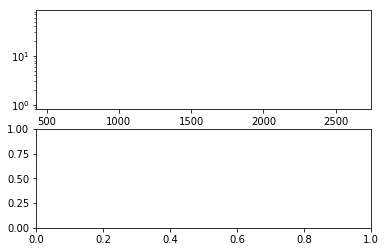

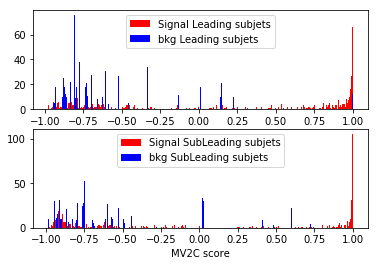

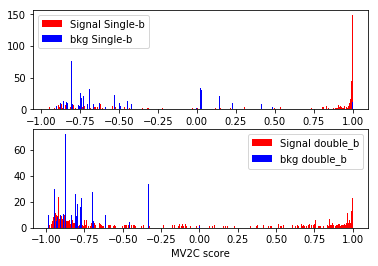

In [10]:
pt_pred =pd.DataFrame({"weight":weight.ravel(),"classes":classes.ravel(),"Y":Y.ravel(),"Y_pred":Y_pred[:,0].ravel(), "mv2c_Lead":mv2c_Lead.ravel(),"mv2c_SubLead":mv2c_SubLead.ravel(), "jet_pt":jet_pt.ravel()})
pt_pred['dl_score']=np.log(pt_pred['Y_pred']/(1-pt_pred['Y_pred']))
pt_pred['single_b_mv2']=pt_pred[['mv2c_Lead', 'mv2c_SubLead']].max(axis=1)
pt_pred['double_b_mv2']=pt_pred[['mv2c_Lead', 'mv2c_SubLead']].min(axis=1)

pt_pred_h=pt_pred[(pt_pred['jet_pt']>1200)&(pt_pred['jet_pt']<2000)]
pt_pred_m=pt_pred[(pt_pred['jet_pt']>500)&(pt_pred['jet_pt']<800)]
pt_pred_l=pt_pred[(pt_pred['jet_pt']>300)&(pt_pred['jet_pt']<500)]
#print(pt_pred_h)
fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.hist(pt_pred[pt_pred['Y']==0]['jet_pt'], 400,normed=0, weights= pt_pred[pt_pred['Y']==0]['weight'],color='r',  label='Signal Leading subjets')                                                          
ax1.hist(pt_pred[pt_pred['Y']==1]['jet_pt'], 400,normed=0, weights= pt_pred[pt_pred['Y']==1]['weight'],color='b',   label='bkg Leading subjets')                                                          
ax1.set_yscale('log')
fig.show()

fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.hist(pt_pred[pt_pred['Y']==0]['mv2c_Lead'], 400,normed=0, weights= pt_pred[pt_pred['Y']==0]['weight'],color='r',  label='Signal Leading subjets')                                                          
ax1.hist(pt_pred[pt_pred['Y']==1]['mv2c_Lead'], 400,normed=0, weights= pt_pred[pt_pred['Y']==1]['weight'],color='b',   label='bkg Leading subjets')                                                          


ax1.legend()
ax2.hist(pt_pred[pt_pred['Y']==0]['mv2c_SubLead'], 400,normed=0, weights= pt_pred[pt_pred['Y']==0]['weight'],color='r', label='Signal SubLeading subjets')                                                          
ax2.hist(pt_pred[pt_pred['Y']==1]['mv2c_SubLead'], 400,normed=0, weights= pt_pred[pt_pred['Y']==1]['weight'],color='b',   label='bkg SubLeading subjets')                                                          

#ax1.set_yscale('log')
plt.xlabel('MV2C score')
plt.legend()
fig.savefig('mv2c_subjet.pdf')
fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.hist(pt_pred[pt_pred['Y']==0]['single_b_mv2'], 400,normed=0, weights= pt_pred[pt_pred['Y']==0]['weight'],color='r',  label='Signal Single-b')                                                          
ax1.hist(pt_pred[pt_pred['Y']==1]['single_b_mv2'], 400,normed=0, weights= pt_pred[pt_pred['Y']==1]['weight'],color='b',  label='bkg Single-b')                                                          

ax1.legend()
ax2.hist(pt_pred[pt_pred['Y']==0]['double_b_mv2'], 400,normed=0, weights= pt_pred[pt_pred['Y']==0]['weight'],color='r',  label='Signal double_b')                                                          
ax2.hist(pt_pred[pt_pred['Y']==1]['double_b_mv2'], 400,normed=0, weights= pt_pred[pt_pred['Y']==1]['weight'],color='b',  label='bkg double_b')                                                          

#ax1.set_yscale('log')
plt.xlabel('MV2C score')
plt.legend()
#print(np.shape(pt_pred_h[(pt_pred_h['Y']!=pt_pred_h['classes'])&(pt_pred_h['Y']!=0)]))
#plt.hist(pt_pred['Y_pred'],200,weights= pt_pred['weight'],histtype='step')
plt.show()

fig.savefig('sig_double.pdf')

In [11]:
outputName="rej_plot.root"
approachList=[]
print(np.shape(np.array(df['Y0'])))
print(np.shape(np.array(df['jet_pt'])))
approachList.append((np.array(df['Y0']),np.array(df['jet_pt']),np.array(bkg['Y0']),np.array(bkg['jet_pt']),("DL training","60%")))
approachList.append((np.array(df['double_b_mv2']),np.array(df['jet_pt']),np.array(bkg['double_b_mv2']),np.array(bkg['jet_pt']),("double_b_mv2","60%")))
approachList.append((np.array(df['single_b_mv2']),np.array(df['jet_pt']),np.array(bkg['single_b_mv2']),np.array(bkg['jet_pt']),("single_b_mv2","60%")))
weight=df['weight']
weight_bkg=bkg['weight']
MultipleRejCurve(outputName, approachList, weight, weight_bkg, ptbins)



(586,)
(586,)
0.6
[0.99046319723129272, 0.98900407552719116, 0.99329280853271484, 0.98998242616653442, 0.9922187328338623, 0.99012285470962524, 0.98468983173370361]
0.6
[-0.84519028663635254, -0.74358165264129639, -0.80637639760971069, -0.73685944080352783, -0.66260075569152832, -0.70518869161605835, 0.0]
0.6
[-0.44847843050956726, 0.74793344736099243, 0.91400754451751709, 0.73738008737564087, 0.960540771484375, -0.61611121892929077, 0.98343050479888916]


Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency


In [12]:
outputName="rej_plot.root"
approachList=[]

approachList.append((np.array(df['Y0']),np.array(df['jet_pt']),np.array(bkg['Y0']),np.array(bkg['jet_pt']),("DL training","60%")))
approachList.append((np.array(df['double_b_mv2']),np.array(df['jet_pt']),np.array(bkg['double_b_mv2']),np.array(bkg['jet_pt']),("double_b_mv2","60%")))
approachList.append((np.array(df['single_b_mv2']),np.array(df['jet_pt']),np.array(bkg['single_b_mv2']),np.array(bkg['jet_pt']),("single_b_mv2","60%")))
weight=df['weight']
weight_bkg=bkg['weight']
MultipleRejCurve(outputName, approachList, weight,weight_bkg, ptbins)

0.6
[0.99046319723129272, 0.98900407552719116, 0.99329280853271484, 0.98998242616653442, 0.9922187328338623, 0.99012285470962524, 0.98468983173370361]
0.6
[-0.84519028663635254, -0.74358165264129639, -0.80637639760971069, -0.73685944080352783, -0.66260075569152832, -0.70518869161605835, 0.0]
0.6
[-0.44847843050956726, 0.74793344736099243, 0.91400754451751709, 0.73738008737564087, 0.960540771484375, -0.61611121892929077, 0.98343050479888916]


Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency


In [13]:
def ConvertEffToGraph(effplot, bins, doEff=True):
    print (effplot)
    eff = []
    efferror = []
    print(bins, len(bins))
    for i in range(len(bins)-1):
        if doEff:
            eff.append(effplot.GetEfficiency(i+1))
            efferror.append(effplot.GetEfficiencyErrorLow(i+1))
        else:
            if (effplot.GetEfficiency(i+1)==0):
                eff.append(1)
                efferror.append( effplot.GetEfficiencyErrorLow(i+1)/1 )
            else:
                eff.append(1./(effplot.GetEfficiency(i+1)))
                efferror.append( (effplot.GetEfficiencyErrorLow(i+1)/effplot.GetEfficiency(i+1))/effplot.GetEfficiency(i+1) )


    bins=bins+np.ones(8)*100
    bins=bins[:-1]
    
    newgraph = ROOT.TGraphErrors (len(bins), array.array('d', bins), array.array('d', eff), array.array('d', [0]*len(bins)), array.array('d', efferror))
    return newgraph
    #for i in range(len(bins)):
    #    newgraph.SetBinError(i+1, eff[i])

def GetRelativeRej(rejplot1, rejplot2, bins):
    rel = []
    relerror = []

    for i in range(len(bins)):
        rel.append( rejplot1.GetEfficiency(i+1)/rejplot2.GetEfficiency(i+1) )
        relerror.append( rel[i]*sqrt( (rejplot1.GetEfficiencyErrorLow(i+1)/rejplot1.GetEfficiency(i+1))**2 + (rejplot2.GetEfficiencyErrorLow(i+1)/rejplot2.GetEfficiency(i+1))**2 ) )

    newgraph = ROOT.TGraphErrors (len(bins), array.array('d', bins), array.array('d', rel), array.array('d', [0]*len(bins)), array.array('d', relerror))
    return newgraph

In [14]:
outputName="eff_plot.root"
file=ROOT.TFile(outputName, "r")
dltree=file.Get("DL training")
dmtree=file.Get("double_b_mv2")
smtree=file.Get("single_b_mv2")
EffCurves = [dltree,dmtree,smtree]
label = ["DL training(60% WP)","Baseline double-btagged subjets(60% WP)","Baseline single-btagged subjets(60% WP)"]
legend = ROOT.TLegend(0.1, 0.7, 0.5, 0.9)
legend_rel = ROOT.TLegend(0.1, 0.7, 0.5, 0.9)
colorlist=[2,8,38]
ROCs = []
varname="eff"
canvas = ROOT.TCanvas(varname, varname, 800, 600)
mg = ROOT.TMultiGraph()
mg_rel = ROOT.TMultiGraph()

for i in range(len(EffCurves)):

    ROC = ConvertEffToGraph(EffCurves[i],ptbins, True)

    ROC.SetLineWidth(2)
    ROC.SetLineColor(colorlist[i])
    ROC.SetMarkerColor(colorlist[i])
    ROC.SetMarkerStyle(1)
    mg.SetTitle("Hbb-tagging efficiency for a fixed 60% WP cut Vs Large R-jet pT;Jet Pt(GeV); Hbb-tagging efficiency")

    mg.Add(ROC)

    legend.AddEntry(ROC, label[i], "lp")

    ROCs.append(ROC)

mg.Draw("AL*")
mg.GetHistogram().SetMaximum(1.)
legend.Draw("same")
canvas.SaveAs("eff.pdf")

file.Close()
canvas.Close()

<ROOT.TEfficiency object ("DL training") at 0xdc63280>
(array([  590.,   660.,   730.,   800.,   870.,   940.,  1010.,  1080.]), 8)
<ROOT.TEfficiency object ("double_b_mv2") at 0x9c38f20>
(array([  590.,   660.,   730.,   800.,   870.,   940.,  1010.,  1080.]), 8)
<ROOT.TEfficiency object ("single_b_mv2") at 0xcd81e40>
(array([  590.,   660.,   730.,   800.,   870.,   940.,  1010.,  1080.]), 8)


Info in <TCanvas::Print>: pdf file eff.pdf has been created


In [15]:
import ROOT
outputName="rej_plot.root"
file=ROOT.TFile(outputName, "r")
dltree=file.Get("DL training")
dmtree=file.Get("double_b_mv2")
smtree=file.Get("single_b_mv2")
EffCurves = [dltree,dmtree,smtree]
label = ["DL training(60% WP)","Baseline double-btagged subjets(60% WP)","Baseline single-btagged subjets(60% WP)"]
legend = ROOT.TLegend(0.1, 0.7, 0.5, 0.9)
legend_rel = ROOT.TLegend(0.1, 0.7, 0.5, 0.9)
colorlist=[2,8,38]

varname="rej"
canvas = ROOT.TCanvas(varname, varname, 800, 600)
mg = ROOT.TMultiGraph()
mg_rel = ROOT.TMultiGraph()

for i in range(len(EffCurves)):

    ROC = ConvertEffToGraph(EffCurves[i],ptbins, False)

    ROC.SetLineWidth(2)
    ROC.SetLineColor(colorlist[i])
    ROC.SetMarkerColor(colorlist[i])
    ROC.SetMarkerStyle(1)
    #mg.GetYaxis().SetTitle("Dijet Rejection")
    mg.Add(ROC)
    mg.SetTitle("Dijets rejection at flat Hbb-tagging efficiency of 60% vs Large R-jet pT;Jet Pt(GeV); Dijets Rejection")


    legend.AddEntry(ROC, label[i], "lp")

    ROCs.append(ROC)

mg.Draw("AL*")
mg.GetHistogram().SetMaximum(250.)

legend.Draw("same")

canvas.SaveAs("rej.pdf")

file.Close()
canvas.Close()

<ROOT.TEfficiency object ("DL training") at 0xd4cb070>
(array([  590.,   660.,   730.,   800.,   870.,   940.,  1010.,  1080.]), 8)
<ROOT.TEfficiency object ("double_b_mv2") at 0xdbadac0>
(array([  590.,   660.,   730.,   800.,   870.,   940.,  1010.,  1080.]), 8)
<ROOT.TEfficiency object ("single_b_mv2") at 0xdb44ac0>
(array([  590.,   660.,   730.,   800.,   870.,   940.,  1010.,  1080.]), 8)


Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Info in <TCanvas::Print>: pdf file rej.pdf has been created


/cvmfs/sft.cern.ch/lcg/views/LCG_93/x86_64-slc6-gcc62-opt/lib/python2.7/site-packages/numpy/lib/function_base.py:817: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bins


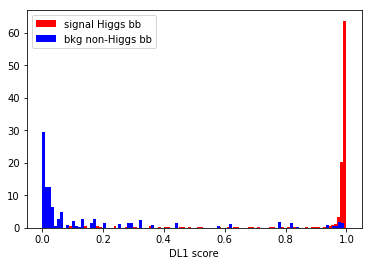

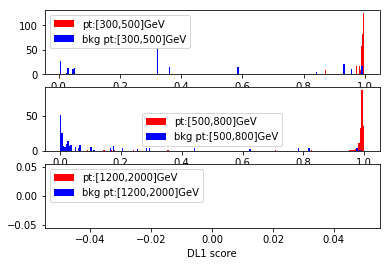

<function matplotlib.pyplot.close>

In [16]:
fig, (ax1) = plt.subplots(nrows=1)
import math
#print(pt_pred[pt_pred['Y']==0]['Y_pred'])
#print(pt_pred[pt_pred['Y']==1]['Y_pred'])
#for i in range(0,2):
  #  print(i)1
    #ratio[i]=pt_pred[pt_pred['Y']==i]['weight'].sum()
    #ratio[i]=1pt_pred['Y_pred']#
pt_pred['dl_score']=pt_pred['Y_pred']#np.log(pt_pred['Y_pred']/(1-pt_pred['Y_pred']))#

#print (pt_pred)
#print (dl)
#pt_pred['dl_score']=pt_pred['dl_score']/(pt_pred['dl_score'].max(axis=0)-pt_pred['dl_score'].min(axis=0))
#pt_pred['dl_score']=pt_pred['Y_pred']
ax1.hist(pt_pred[pt_pred['Y']==0]['dl_score'],100,weights=pt_pred[pt_pred['Y']==0]['weight'], label='signal Higgs bb',color='r', normed=1)
ax1.hist(pt_pred[pt_pred['Y']==1]['dl_score'],100,weights=pt_pred[pt_pred['Y']==1]['weight'],  label='bkg non-Higgs bb',color='b', normed=1)
#ax1.hist(pt_pred[pt_pred['Y']==0]['dl_score'],200,weights=pt_pred[pt_pred['Y']==0]['weight'], histtype='step', label='signal Higgs bb',color='r', normed=1)
#ax1.hist(pt_pred[pt_pred['Y']==1]['dl_score'],200,weights=pt_pred[pt_pred['Y']==1]['weight'], histtype='step', label='bkg non-Higgs bb',color='b', normed=1)
ax1.legend()
plt.xlabel('DL1 score')


      
fig.savefig("DL_score.pdf")
#ax1.set_xlim(-1,1)
#ax1.set_yscale('log')
fig, (ax2, ax3, ax4) = plt.subplots(nrows=3)
ax2.hist(pt_pred_h[pt_pred_h['Y']==0]['Y_pred'],200,weights= pt_pred_h[pt_pred_h['Y']==0]['weight'],label='pt:[300,500]GeV',color='r', normed=1)
ax3.hist(pt_pred_m[pt_pred_m['Y']==0]['Y_pred'],200,weights= pt_pred_m[pt_pred_m['Y']==0]['weight'],label='pt:[500,800]GeV',color='r',normed=1)
ax4.hist(pt_pred_l[pt_pred_l['Y']==0]['Y_pred'],200,weights= pt_pred_l[pt_pred_l['Y']==0]['weight'],label='pt:[1200,2000]GeV', color='r',normed=1)
ax2.hist(pt_pred_h[pt_pred_h['Y']==1]['Y_pred'],200,weights= pt_pred_h[pt_pred_h['Y']==1]['weight'],label='bkg pt:[300,500]GeV',color='b', normed=1)
ax3.hist(pt_pred_m[pt_pred_m['Y']==1]['Y_pred'],200,weights= pt_pred_m[pt_pred_m['Y']==1]['weight'],label='bkg pt:[500,800]GeV',color='b', normed=1)
ax4.hist(pt_pred_l[pt_pred_l['Y']==1]['Y_pred'],200,weights= pt_pred_l[pt_pred_l['Y']==1]['weight'],label='bkg pt:[1200,2000]GeV',color='b', normed=1)
#ax2.set_xlim(-1,1)
#ax3.set_xlim(-1,1)
#ax4.set_xlim(-1,1)

ax2.legend()
ax3.legend()
ax4.legend()
#plt.yscale('log')
plt.legend()
plt.xlabel('DL1 score')

plt.show()

      
fig.savefig("DL_score_pt.pdf")
#plt.hist(Y_pred[:,0],200,histtype='step')
plt.close


In [ ]:
from sklearn import metrics
#print(np.shape(mine))
#print(np.shape(mine_bkg))
#print(Y_pred[0,:])
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(nrows=1)

#dl=(df0['Y0']<0.958226).astype(int)
roc_dl=metrics.accuracy_score(Y, classes)

#x=mv2c['single_b_mv2']
#class_mv2=(df0['single_b_mv2']<cut_single).astype(int)
#class_mv2_d=(df0['double_b_mv2']<cut_double).astype(int)


#np.where(x>0.83)
#print(x)
#y=x.astype(int)
    
#print(y)
#roc_mv= metrics.accuracy_score(Y,  class_mv2)
#roc_mv_d= metrics.accuracy_score(Y, class_mv2_d)

fpr, tpr, thresholds = metrics.roc_curve(df0['Y'],df0['Y0'],pos_label=0,sample_weight=df0['weight'])
#plt.show()
#print (tpr)
plt.plot(fpr,tpr,'r',label='DL score: %0.2f' % roc_dl)

#mv_class=((df0['double_b_mv2']>0.64))
#mv_class=((df0['_b_mv2']>0.64))
#print (fpr1,tpr1, thresholds)
#print(np.shape(Y))
fpr1, tpr1, thresholds1 = metrics.roc_curve(Y, df0['double_b_mv2'], pos_label=0,sample_weight=df0['weight'])

plt.plot(fpr1,tpr1,'b', label='baseline double b-subjet')
fpr10, tpr10, thresholds10 = metrics.roc_curve(Y,df0['single_b_mv2'], pos_label=0,sample_weight=df0['weight'])

plt.plot(fpr10,tpr10,'g', label='baseline single b-subjet')

#fpr3, tpr3, thresholds3 = metrics.roc_curve(Y1,Y_pred1[:,0],pos_label=0,sample_weight=weight1)
#plt.plot(fpr3,tpr3,'y', label='DL Training(5 classes)')
plt.legend(bbox_to_anchor=(0.9,0.3),fontsize=15)
#plt.xlabel('Higgs bb tagging efficiency')
#plt.ylabel('non-bb rejection')
plt.xlabel('FPF')
plt.title('ROC curve')
plt.ylabel('TPF')
plt.show() 
#print (weight)
# Print AUC
#auc = np.trapz(tpr,fpr)
fig.savefig("ROC.pdf")



In [ ]:
#print(((pt_pred['Y']==0)&(pt_pred['classes']==0)))
#pt_pred
fig, ax1 = plt.subplots(nrows=1)


#pt_pred=pt_pred[(pt_pred['jet_pt']<2000)&(pt_pred['jet_pt']>0)]
#pt_pred1=pt_pred1[(pt_pred1['jet_pt']<2000)&(pt_pred1['jet_pt']>0)]
sig_ind=(pt_pred['Y']==0)
bkg_ind=(pt_pred['Y']==1)
#sig_ind1=(pt_pred1['Y']==0)
#bkg_ind1=(pt_pred1['Y']!=1)
#print(pt_pred)
#print (sig_ind, bkg_ind)



sig2,_=np.histogram(pt_pred[pt_pred['Y']==0]['double_b_mv2']/2,5000)
#weight_sig,_=np.histogram(pt_pred['weight'][sig_ind],5000)
#print(np.shape(sig),np.shape(weight_sig))
bkg2,_=np.histogram(pt_pred[pt_pred['Y']==1]['double_b_mv2']/2,5000)
#weight_bkg,_=np.histogram(pt_pred['weight'][bkg_ind],5000)
#print(sig)
sig_eff2=np.add.accumulate(sig2[::-1])/np.sum(sig_ind)
bkg_rej2=np.add.accumulate(bkg2[::-1])/np.sum(bkg_ind)


sig21,_=np.histogram(pt_pred[pt_pred['Y']==0]['single_b_mv2']/2,5000)
#weight_sig,_=np.histogram(pt_pred['weight'][sig_ind],5000)
#print(np.shape(sig),np.shape(weight_sig))
bkg21,_=np.histogram(pt_pred[pt_pred['Y']==1]['single_b_mv2']/2,5000)
#weight_bkg,_=np.histogram(pt_pred['weight'][bkg_ind],5000)
#print(sig)
sig_eff21=np.add.accumulate(sig21[::-1])/np.sum(sig_ind)
bkg_rej21=np.add.accumulate(bkg21[::-1])/np.sum(bkg_ind)
#print(pt_pred1)
#sig1,_=np.histogram(pt_pred1[pt_pred1['Y']==0]['dl_score'],5000)
#weight_sig1,_=np.histogram(pt_pred1['weight'][sig_ind1],5000)
#bkg1,_=np.histogram(pt_pred1[pt_pred1['Y']==1]['dl_score'],5000)
#weight_bkg1,_=np.histogram(pt_pred1['weight'][bkg_ind1],5000)

#sig_eff1=np.add.accumulate(sig1[::-1])/np.sum(sig_ind1)
#bkg_rej1=np.add.accumulate(bkg1[::-1])/np.sum(bkg_ind1)

sig,_=np.histogram(pt_pred[pt_pred['Y']==0]['Y_pred'],5000)
#weight_sig,_=np.histogram(pt_pred['weight'][sig_ind],5000)
bkg,_=np.histogram(pt_pred[pt_pred['Y']==1]['Y_pred'],5000)
#weight_bkg,_=np.histogram(pt_pred['weight'][bkg_ind],5000)
sig_eff=np.add.accumulate(sig[::-1])/np.sum(sig_ind)
bkg_rej=np.add.accumulate(bkg[::-1])/np.sum(bkg_ind)


#plt.hist(sig_eff,100)
plt.plot(sig_eff, 1/bkg_rej,'r',label='DL score')
#plt.plot(sig_eff1,1/bkg_rej1,'r',label='DL1 5classes')
plt.plot(sig_eff21, 1/bkg_rej21,'b',label='baseline single-b score')
plt.plot(sig_eff2, 1/bkg_rej2,'g',label='baseline double_b score')
plt.yscale('log')
plt.legend(fontsize=15)

plt.xlabel('Higgs bb tagging efficiency')
plt.title('The dijet rejection vs Higgs bb tagging efficiency')
plt.ylabel('Dijet rejection,(1/$\epsilon_{dijet}$)')
#plt.ylim(1,1e5)
#plt.xlim(0,1)
plt.show()
fig.savefig("ROC_ATLAS.pdf")

In [ ]:
import pandas as pd  
import matplotlib.pyplot as plt 
import numpy as np
print  (pd.show_versions())
#file='hist__D_80_64_32_32_16_8_4_2relu_adam_clipn0_binary_crossentropybcujets_pTmax300GeV__b_reweighting_tensorflow__lr10_trainBS256_nE100_s12264_val10.h5'
#file='/Users/elenavillhauer/h_bbar_DL/output_lowpileup_157_559pm/hist__D_80_64_32_32_16_8_4_2__BN_relu_adam_clipn0_binary_crossentropybcujets_pTmax300GeV__b_reweighting_tensorflow__lr10_trainBS128_nE500_s12264_val10.h5'
file='/eos/user/e/ebusch/DL_training/DL_train_double_b/scripts/KerasFiles_fullpt/D_80_64_32_32_16_8_4_2__BN_relu_adam_clipn0_binary_crossentropy/Keras_output/hist__D_80_64_32_32_16_8_4_2__BN_relu_adam_clipn0_binary_crossentropybcujets_pTmax300GeV__b_reweighting_tensorflow__lr10_trainBS128_nE100_s12264_val10.h5'
#/Users/elenavillhauer/h_bbar_DL/lowpileup/hist__D_80_64_32_32_16_8_4_2__BN_relu_adam_clipn0_binary_crossentropybcujets_pTmax300GeV__b_reweighting_tensorflow__lr10_trainBS64_nE100_s12264_val10.h5'
#hist__D_80_64_32_32_16_8_4_2__BN_relu_adam_clipn0_binary_crossentropybcujets_pTmax300GeV__b_reweighting_tensorflow__lr10_trainBS512_nE100_s12264_val10.h5'

fig, ax1 = plt.subplots(nrows=1)
train_loss=pd.read_hdf(file, key='history')['loss']
val_loss=pd.read_hdf(file, key='history')['val_loss']
train_acc=pd.read_hdf(file, key='history')['acc']
val_acc=pd.read_hdf(file, key='history')['val_acc']
#print(train_loss)
plt.plot(np.linspace(0,len(train_loss),len(train_loss)),train_loss,label='Training Loss(Dropout(0.1))')
plt.plot(np.linspace(0,len(val_loss),len(val_loss)),val_loss,label='Validation Loss)')
plt.legend(fontsize=15)
plt.xlabel('Numbers of epochs')
plt.ylabel("Loss")

plt.show()
fig.savefig("loss.pdf")
fig, ax1 = plt.subplots(nrows=1)
plt.plot(np.linspace(0,len(train_acc),len(train_acc)),train_acc,label='Training Accuracy(Dropout(0.1))')
plt.plot(np.linspace(0,len(val_acc),len(val_acc)),val_acc,label='Validation Accuracy)')
plt.xlabel('Numbers of epochs')
plt.ylabel("Accuracy")
#plt.show()
plt.ylim(0.9,.97)
plt.legend(fontsize=15)
plt.show()
fig.savefig("acc.pdf")
#file.close()



In [ ]:
import pandas as pd   
#import wkhtmltoimage
import numpy as np
pd.set_option('precision', 2)
file='/eos/user/e/ebusch/DL_training/DL_train_double_b/scripts/KerasFiles_fullpt/D_80_64_32_32_16_8_4_2__BN_relu_adam_clipn0_binary_crossentropy/Keras_output/Keras_output__D_80_64_32_32_16_8_4_2__BN_relu_adam_clipn0_binary_crossentropybcujets_pTmax300GeV__b_reweighting_tensorflow__lr10_trainBS128_nE100_s12264_val10.h5'
data = pd.read_csv(file, sep=" ",header = None)
data.columns = ["Filter eff", "cross section", "mcwg(averaged)", "DAOD events #", "Entries with cut(jet-based)"]
data['estimated weight(with averaged mcwg)']=data["Filter eff"]*data["cross section"]*data["mcwg(averaged)"]/data["DAOD events #"]
#data=data[["Filter eff", "cross section", "DAOD event", "Entries after all cut(jet-based)"]]

data.rename({0: "JZ0W", 1: "JZ1W",2: "JZ2W", 3: "JZ3W"})
#print(np.array(data["cross section"]))

data.update(data.find(1.00))
print(data)

In [ ]:
import json
from keras.models import  model_from_json
import tensorflow
import os
json_file = open('/Users/juechen/Documents/course/research/double-bplots/KerasFiles/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json( loaded_model_json)
# load weights into new model
loaded_model.load_weights("/Users/juechen/Documents/course/research/double-bplots/KerasFiles/model.h5")
print("Loaded model from disk")

In [ ]:
a=np.random.randint(5, size=(3,4))
b=np.random.randint(5, size=(3,4))
#print(a)
print(np.where(b==0))

b=np.where(b ==0, 1, b)
print(b)
#print(np.sum(a,axis=0))
#print(np.count_nonzero(b,axis=0))
mean=np.divide(np.sum(a,axis=0),np.count_nonzero(b,axis=0))
print(mean)
pt=np.ones(len(a))
pt.shape=(len(a),1)
mean.shape=(len(a[0]),1)
mean=pt*mean.T

weight=np.divide(mean,b)

print(mean)
#weight[weight == inf] = 0

print(weight)

In [ ]:
def find_nearest1D(array,value):                                                                                                                                                                                                                           
     #check if value is below lowest or above higest bin edge,                                                                                                                                                                                             
     highBin = array[-1]                                                                                                                                                                                                                                   
     lowbin = array[0]                                                                                                                                                                                                                                     
                                                                                                                                                                                                                                                           
     if value >= highBin:                                                                                                                                                                                                                                  
         return str(array[-2])+'_'+str(array[-1])                                                                                                                                                                                                          
     if value < lowbin:                                                                                                                                                                                                                                    
         return str(array[0])+'_'+str(array[1])                                                                                                                                                                                                            
                                                                                                                                                                                                                                                           
     idxLow = (np.abs(array[array <= value]-value)).argmin()                                                                                                                                                                                               
     idxHigh = (np.abs(array[array > value]-value)).argmin()                                                                                                                                                                                               
                                                                                                                                                                                                                                                           
     return str(array[array <= value][idxLow])+'_'+str( array[array > value][idxHigh] )                                                                                                                                                                    
                                                                                                                                                                                                                                                           
                                                                                                                                                                                                                                                           
def find2dBin(xval, yval, xbins, ybins):                                                                                                                                                                                                                   
                                                                                                                                                                                                                                                           
     xbinning = find_nearest1D(xbins,xval)                                                                                                                                                                                                                 
     ybinning = find_nearest1D(ybins,yval)                                                                                                                                                                                                                 
                                                                                                                                                                                                                                                           
     return xbinning+'_'+ybinning                                                                                                                                                                                                                          
                                                                                                                                                                                                                                                           
def makeBinValueDict(array,x_edges,y_edges):                                                                                                                                                                                                               
                                                                                                                                                                                                                                                           
     binvaldict = {}                                                                                                                                                                                                                                       
                                                                                                                                                                                                                                                           
     for xi in range(len(x_edges)-1):                                                                                                                                                                                                                      
         for yi in range(len(y_edges)-1):                                                                                                                                                                                                                  
             binname = str(x_edges[xi])+'_'+str(x_edges[xi+1])+'_'+str(y_edges[yi])+'_'+str(y_edges[yi+1])                                                                                                                                                 
             binval = array[xi][yi]                                                                                                                                                                                                                        
             if np.isnan(binval):                                                                                                                                                                                                                          
                 binval = 1.0                                                                                                                                                                                                                              
             binvaldict[binname]=binval                                                                                                                                                                                                                    
     return binvaldict                                                                                                                                                                                                                                     
                           

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
ptarray_sig = np.random.normal(0, 1, 100000)
etaarray_sig= np.random.normal(0, 1, 100000)
ptarray_bkg = np.random.normal(0, 2, 100000)
etaarray_bkg= np.random.normal(0, 2, 100000)
ptbins = np.linspace(ptarray_sig.min(),ptarray_sig.max(),50)                                                                                                                                                                                       
etabins = np.linspace(etaarray_sig.min(),etaarray_sig.max(),2)                                                                                                                                                                                    
#print(ptbins)         
fig=plt.subplots(nrows=2)

plt.hist(ptarray_sig,50)
plt.show()

plt.hist(etaarray_sig,50)
plt.show()
plt.hist(ptarray_bkg,50)
plt.show()

plt.hist(etaarray_bkg,50)
plt.show()
Hsig, xedges, yedges = np.histogram2d(ptarray_sig, etaarray_sig, bins=(ptbins, etabins))#, weights=weight_sig)                                                                                                                                         
Hbkg, xedges, yedges = np.histogram2d(ptarray_bkg, etaarray_bkg, bins=(ptbins, etabins))#, weights=weight_bkg)  
#print(xedges, yedges)

#plt.show()
a = Hsig                                                                                                                                                                                                                                               
b= Hbkg                                                                                                                                                                                                                                                
mean=np.divide(np.sum(a,axis=0),np.count_nonzero(b,axis=0))      
pt=np.ones(len(a))                         
pt.shape=(len(a),1)                        
mean.shape=(len(a[0]),1)                   
mean=pt*mean.T    
b[b==0]=1
weight=np.divide(mean,b)                                                                                                                                                                                                                               
#from numpy import inf                                                                                                                                                                                                                                     
#weight[weight == ] = 0                                                                                                                                                                                                                                 
weightHist=weight      
#print(weightHist)
weightDict = makeBinValueDict(weightHist,xedges, yedges)     
#print (weightDict )                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
weightarray = []                                                                                                                                                                                                                                         
#loop over background array    
#print(len(ptarray_bkg))
for i in range(len(ptarray_bkg)):                                                                                                                                                                                                                                          
    xval = ptarray_bkg[i]                                                                                                                                                                                                                                            
    yval = etaarray_bkg[i]  
    #print(xval, yval)
    #print(weightDict[find2dBin(xval,yval,xedges,yedges)])
    weightarray.append( weightDict[find2dBin(xval,yval,xedges,yedges)] )   


#print (weightarray  ) 

In [ ]:
fig=plt.subplots(nrows=2)

plt.hist(ptarray_bkg,50,weights=weightarray)
plt.hist(ptarray_sig,50,weights=weightarray, color='r')
plt.show()

plt.hist(etaarray_bkg,50,weights=weightarray)
plt.show()

In [ ]:
import numpy as np
eta_bins = [0., 0.5, 0.75, 1., 2]                                                                                                                                                                                  
eta_bins = [-i for i in eta_bins]+eta_bins[1:5]  
print(np.sort(eta_bins))

pt_bins=np.concatenate([np.arange(250,1250,50),np.arange(1250,2200,750)])
print(np.shape(pt_bins))
print(pt_bins)

a=[1,2,12]
print(np.shape(a))
a.shape=(3,1)